In [18]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
model_root_and_name_tuple_list = [("dbnsfp", "sift"), ("dbnsfp", "polyphen2_HVAR"), ("dbnsfp", "cadd"), ("dbnsfp", "mvp"), ("dbnsfp", "metarnn"), ("dbnsfp", "revel"),
                                  ("tape_rao", "unirep"), ("tape_rao", "protbert"), ("sequnet_dunham", "sequnet"), 
                                  ("esm_rives", "esm1b_t33_650M_UR50S"), ("esm_rives", "esm1v_t33_650M_UR90S"), ("esm_rives", "esm2_t33_650M_UR50D"),
                                  ("bioembeddings_dallago", "plus_rnn"), 
                                  ("bioembeddings_dallago", "prottrans_bert_bfd"), ("bioembeddings_dallago", "prottrans_albert_bfd"),
                                  ("bioembeddings_dallago", "prottrans_xlnet_uniref100"), 
                                  ("bioembeddings_dallago", "prottrans_t5_bfd"), ("bioembeddings_dallago", "prottrans_t5_uniref50"), ("bioembeddings_dallago", "prottrans_t5_xl_u50"),
                                  ("vespa_marquet", "vespal"), 
                                  ("", "random_classifier"), ("", "conservation")]
models_smaller_means_damaging = ["sequnet", "sift"]

In [33]:
result_df = pd.read_csv(home_dir+f"models/aa_common/merged_predictions/popu_freq_analysis.csv", sep="\t")
result_df = result_df[~pd.isna(result_df["conservation_pred"])]  # taking df for only non-NAN values

print(result_df["class"].value_counts())
n_samples = 10000
common = result_df[result_df["class"]=="Common"].sample(n=min(n_samples, result_df[result_df["class"]=="Common"].shape[0]))
rare = result_df[result_df["class"]=="Rare"].sample(n=n_samples)
ultra_rare = result_df[result_df["class"]=="Ultra-rare"].sample(n=n_samples)
# result_df = result_df[(result_df["class"]=="Common") | (result_df["class"]=="Rare") | (result_df["class"]=="Ultra-rare")]
result_df = pd.concat([common, rare, ultra_rare])
result_df.columns

Zero-population    890549
Singleton          206589
Ultra-rare         138540
Rare                11363
Common               7032
Name: class, dtype: int64


Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'class', 'sift_pred',
       'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
       'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
       'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
       'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
       'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
       'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
       'prottrans_t5_xl_u50_pred', 'vespal_pred', 'conservation_pred'],
      dtype='object')

### Conservation vs. mutation allele frequency

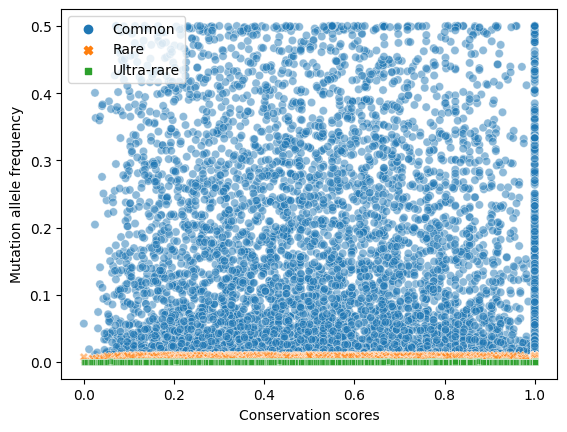

In [37]:
plt.cla()
sns.scatterplot(data=result_df, x="conservation_pred", y="mt_freq", hue="class", style="class", alpha=.5)
plt.legend()
plt.xlabel("Conservation scores")
plt.ylabel("Mutation allele frequency")
# plt.show()
plt.savefig(home_dir+f"models/aa_common/conservation_vs_model_preds_plots/conservation_vs_mt_freq.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

### Conservation vs. models predictions

sift
polyphen2_HVAR
cadd
mvp
metarnn
revel
unirep
protbert
sequnet
esm1b_t33_650M_UR50S
esm1v_t33_650M_UR90S
esm2_t33_650M_UR50D
plus_rnn
prottrans_bert_bfd
prottrans_albert_bfd
prottrans_xlnet_uniref100
prottrans_t5_bfd
prottrans_t5_uniref50
prottrans_t5_xl_u50
vespal
random_classifier


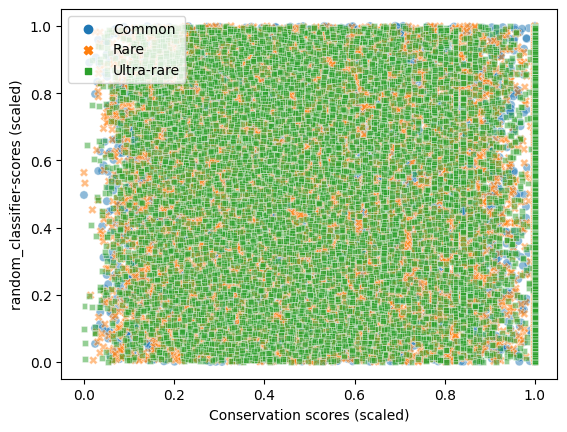

In [38]:

def do_scatter_plot(non_nan_result_df, model_name):
    plt.cla()
    # plt.scatter(result_df['conservation_pred'], result_df['mt_freq'])
    sns.scatterplot(data=non_nan_result_df, x="conservation_pred", y="pred", hue="class", style="class", alpha=.5)
    plt.legend()
    plt.xlabel("Conservation scores (scaled)")
    plt.ylabel(f"{model_name}-scores (scaled)")
    # plt.show()
    plt.savefig(home_dir+f"models/aa_common/conservation_vs_model_preds_plots/{model_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

model_pred_col = "conservation_pred"
result_df[model_pred_col]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]

def get_non_nan_df(df, col_name):
    non_nan_df = df[~pd.isna(df[col_name])]  # taking df for only non-NAN values
    return non_nan_df

for i, (model_root, model_name) in enumerate(model_root_and_name_tuple_list):
    # model_name = "esm2_t33_650M_UR50D"
    if model_name=="conservation": continue

    print(model_name)
    model_pred_col = model_name + "_pred"

    if model_name=="random_classifier": 
        result_df[model_pred_col] = [random.uniform(0,1) for i in range(result_df.shape[0])]

    result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]

    non_nan_result_df = get_non_nan_df(result_df, model_pred_col)
        
    # if model_name in models_smaller_means_damaging:
    #     non_nan_result_df['pred'] = non_nan_result_df['pred'].multiply(-1)

    do_scatter_plot(non_nan_result_df, model_name)
    # break